># Life cycle of the machine learning projects

##### . Understanding the problem statement
##### . Data collection
##### . Data check to perform
##### . Exporatory data analysis (EDA)
##### . Data pre-processing
##### . Model training
##### . Choose the best model


>### 1> Problem statement

##### > To understand how the student performance (test score) is affected by other variables such as the Gender, parent level of education, lunch, test preparation score

># Important libraries used:
Numpy, pandas, matplotlib,warnings

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [25]:
#from sklean.metrics import meconda

In [26]:
#pip install sc

In [27]:
# import the CSV data as pandas dataframe

df=pd.read_csv("StudentsPerformance.csv")

In [28]:
# show top 5 recoeds
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


>##  Dataset information

.Gender --> male/Female

.race/ethnicity: Group A,B,C
.Parental level of education: categorical values 


>## Data checks to perform

#### . Check the missing data
#### . Check Duplicate data
#### . Check the datatype
#### . check the number of unique values of each columns
#### . Check the statistics of the dataset
#### . Check the categorical & numerical colums 

In [29]:
# checking for the misssing value

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
# checking the duplicate data

df.duplicated().sum()

# To remove the duplicate from the code we can use the drop duplicate method

#df.drop_duplicates()

0

In [31]:
# check for data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
# To check the number of the unique values

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
# check the statistics of the dataset

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight of the numerical data:

The mean & std deviation is nearly equal.


In [34]:
# Exploring the data:


#col_lst=df.columns

for col in df.columns:
    if df[col].dtype == 'O':
        print(f" The Categotrical columns: {col} has unique value_of : {df[col].unique()}")
    elif df[col].dtype != 'O':
        print(f" \nThe Numerical columns: {col} has unique value_of : {df[col].nunique()}")

 The Categotrical columns: gender has unique value_of : ['female' 'male']
 The Categotrical columns: race/ethnicity has unique value_of : ['group B' 'group C' 'group A' 'group D' 'group E']
 The Categotrical columns: parental level of education has unique value_of : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 The Categotrical columns: lunch has unique value_of : ['standard' 'free/reduced']
 The Categotrical columns: test preparation course has unique value_of : ['none' 'completed']
 
The Numerical columns: math score has unique value_of : 81
 
The Numerical columns: reading score has unique value_of : 72
 
The Numerical columns: writing score has unique value_of : 77


In [35]:
# defining the numerical & categorical features

Categorical_features=[col for col in df.columns if df[col].dtype == 'O']

Numerical_features=[col for col in df.columns if df[col].dtype != 'O']


In [36]:
Categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [37]:
# Adding the scores to get the total scores as we have to predict the score of the student

df['total_score']= df['math score']+ df['reading score']+df['writing score']
df['Average_score']=df['total_score']/3

In [38]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Exploring the Data { Data Visualization}

#### displaying some average score, distribution
#### using histogram & seaborn


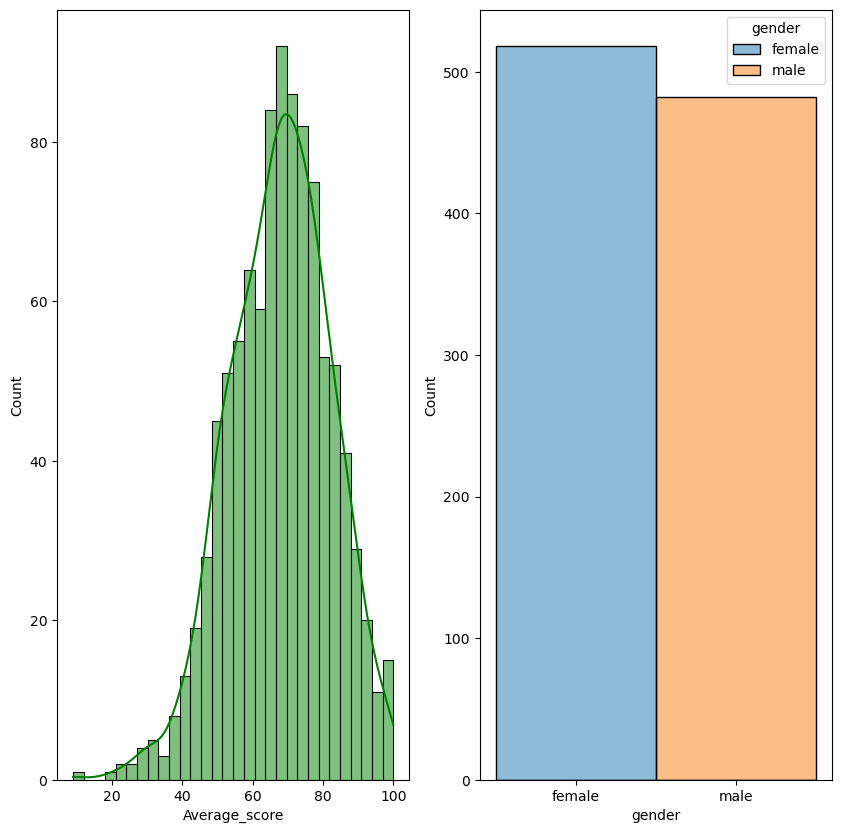

In [39]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',kde=True,color='g',bins=30)
plt.subplot(122)
sns.histplot(data=df,x='gender',hue='gender')
plt.show()
